In [1]:
import mne
import numpy as np
mne.__version__, np.__version__

('1.8.0', '1.26.4')

In [2]:
# List the channels in sequence of registration during digitization. 
# Note, for didgitization we prefer to use sequence from left to right and from front to back

ch_names = [ 
    'Fp1', 'Fpz', 'Fp2',
    'AFp1', 'AFp2',
    'AF7', 'AF3', 'AF4', 'AF8',
    'AFF5h', 'AFF1h', 'AFF2h', 'AFF6h',
    'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10',
    'FFT9h', 'FFT7h', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FFT8h', 'FFT10h',
    'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10',
    'FTT9h', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h', 'FTT10h',
    'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 
    
    'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h',
    'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10',
    'TPP9h', 'TPP7h', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h', 'CPP6h', 'TPP8h', 'TPP10h',
    'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10',
    'PPO9h', 'PPO5h', 'PPO1h', 'PPO2h', 'PPO6h', 'PPO10h', 
    'PO9', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'PO10',
    'POO9h', 'POO1', 'POO2', 'POO10h',
    'O1', 'Oz', 'O2',
    'OI1h', 'OI2h',
    'I1', 'I2' 
] # 128 channels

In [3]:
subject = 'IS' # subject ID

with open(f'data/{subject}/{subject}_ele.nbe') as f:
    contents = f.readlines()
    sensors = [line.strip().split('\t')[:3] for line in contents if 'Point' in line]
    sensors = np.array(sensors).astype(float)


with open(f'data/{subject}/{subject}_hsp.nbe') as f:
    contents = f.readlines()
    hsp = [line.strip().split('\t')[:3] for line in contents if 'Point' in line]
    hsp = np.array(hsp).astype(float)

with open(f'data/{subject}/{subject}_fid.nbe') as f:
    contents = f.readlines()
    fid = [line.strip().split('\t')[:3] for line in contents if 'Point' in line]
    fid = np.array(fid).astype(float)

fs = 1000
coef = 1000 # to convert from millimeters to meters
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names, sensors/coef)), 
                                        lpa=fid[0]/coef, nasion=fid[1]/coef, rpa=fid[2]/coef, 
                                        hsp=hsp/coef,
                                        coord_frame='mri')
info = mne.create_info(ch_names, fs, ch_types='eeg')
info.set_montage(montage)

info.save(f'data/{subject}/{subject}-info.fif')

# Next, when using mne.gui.coregistration upload this -info.fif file as info source with digitization.

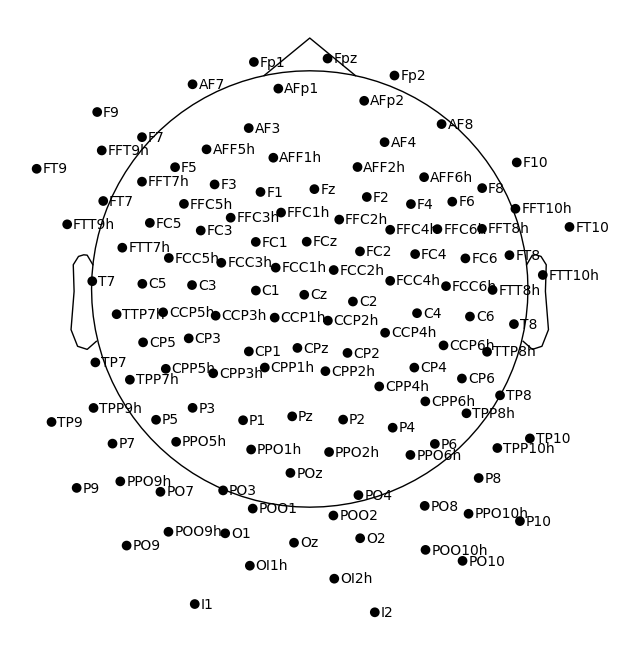

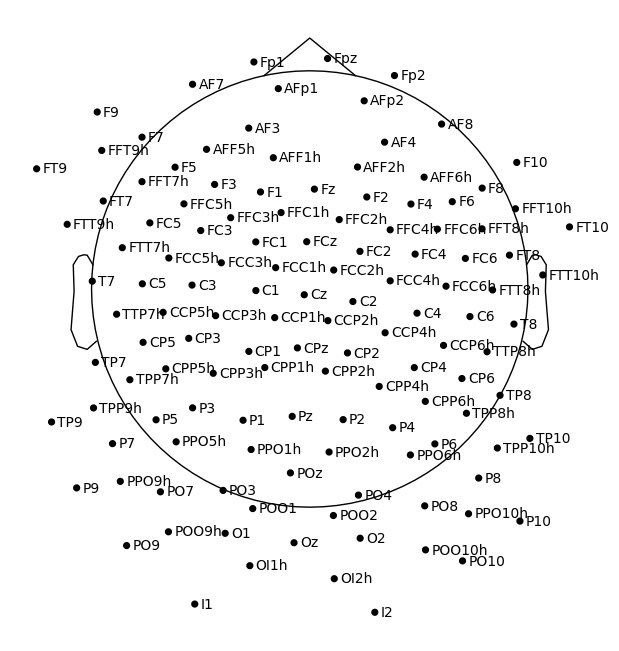

In [4]:
montage.plot()